In [2]:
# importing prerequisites libraries
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
# loading our dataset from a local directory
df = pd.read_csv('../tochora/baba/DisneylandReviews.csv', encoding='latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
df.shape

(42656, 6)

this dataset has 42656 rows and 6 columns

In [5]:
# columns in the dataset
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [6]:
# converting year month from an object to datetime
df['Year_Month'] = pd.to_datetime(df['Year_Month'], errors='coerce')


In [7]:
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month


In [8]:
# missing data
df.isnull().sum()

Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
Year                 2613
Month                2613
dtype: int64

there are 3 columns that have null entries that is Year-month = 2613, Year=2613, Month=2613

In [9]:
# dropping null values
df.dropna(inplace=True)

Null values are dropped since are from year-found column and therir effect on the dataset is minimal since they are quite few.

In [10]:
# years and their entries
df['Year'].value_counts().sort_values(ascending=False)

2015.0    6979
2016.0    6599
2014.0    5301
2017.0    5195
2013.0    4717
2012.0    4342
2018.0    3997
2011.0    1984
2019.0     786
2010.0     143
Name: Year, dtype: int64

2015 had the highest entries which are 6979 while 2010 had the lowest entries of 143. Thus 2015 had th highest number of reviews while 2010 had the lowest.

In [11]:
# months and their entries
df['Month'].value_counts().sort_values(ascending=False)

8.0     3994
7.0     3880
12.0    3874
10.0    3764
6.0     3590
4.0     3478
5.0     3439
9.0     3230
3.0     3134
11.0    2685
1.0     2516
2.0     2459
Name: Month, dtype: int64

August had the highest entries of 3994 while february had the lowest of only 2459 entries.This means that August had the highest number of reviews while february had the lowest.

In [12]:
df['Reviewer_Location'].value_counts().sort_values(ascending=False)[:10]

United States     13522
United Kingdom     9115
Australia          4412
Canada             2116
India              1470
Philippines        1024
Singapore           971
New Zealand         714
Malaysia            562
Hong Kong           515
Name: Reviewer_Location, dtype: int64

United states has the highest entries of 13522 while Hong Kong had the lowest of 515.This means that most of the united states had the highest number of reviews while Hong Kong had the lowest number of reviews

In [13]:
df['Branch'].value_counts().sort_values(ascending=False)

Disneyland_California    18202
Disneyland_Paris         12694
Disneyland_HongKong       9147
Name: Branch, dtype: int64

Disneyland california had the highest reviews of 18202 while Disneyland Hongkong had the lowest reviews of 9147

In [14]:
df['Rating'].value_counts().sort_values(ascending=False)

5    21908
4    10086
3     4782
2     1929
1     1338
Name: Rating, dtype: int64

Most of the respondents gave 5 rating reviews of 21908 while a few of them gave the lowest reviews rated 1.

In [15]:
df.groupby('Reviewer_Location')['Rating'].mean().sort_values(ascending=False)[:5]

Reviewer_Location
Libya                    5.0
Caribbean Netherlands    5.0
Cuba                     5.0
Curaçao                  5.0
Ethiopia                 5.0
Name: Rating, dtype: float64

Libya, carribean netherlands, ethiopia , cuba and Curacao gave most of the reviews rated 5.

In [16]:
df.groupby('Reviewer_Location')['Rating'].mean().sort_values(ascending=False)[-5:]

Reviewer_Location
Ecuador                     2.333333
Turks and Caicos Islands    2.000000
Andorra                     2.000000
South Sudan                 2.000000
Suriname                    2.000000
Name: Rating, dtype: float64

Ecuador, Turks and Caicos islands, Suriname, south Sudan and Andorra gave the reviews that were lowly rated i.e  2 ratings

In [17]:
df.groupby('Branch')['Rating'].mean()

Branch
Disneyland_California    4.413691
Disneyland_HongKong      4.215480
Disneyland_Paris         3.980542
Name: Rating, dtype: float64

Disneyland california got the highest rated reviews of 4.4 while Disneyland_paris got the lowest rated reviews of 3.9.

In [18]:
df[df['Branch']=='Disneyland_California']['Rating'].value_counts()

5    11802
4     3713
3     1552
2      685
1      450
Name: Rating, dtype: int64

Disneyland _california Branch got many reviews rated 5 of 11802 entries while recieved lowest reviews rated 1 of 450 entries.

In [19]:
df[df['Branch']=='Disneyland_HongKong']['Rating'].value_counts()

5    4338
4    3053
3    1297
2     307
1     152
Name: Rating, dtype: int64

In [20]:
df[df['Reviewer_Location']=='Australia']['Branch'].value_counts()

Disneyland_California    2324
Disneyland_HongKong      1547
Disneyland_Paris          541
Name: Branch, dtype: int64

The branch that got the highest number of  reviews was Disneyland_california which got 2324 entries , 2nd is Disneyland_Hongkong with reviews of 1547 entries while Disneyland_Paris got the lowest number of reviews of only 541 entries.

In [21]:
# a sample of the data
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0


For the purpose of visualisation and prediction this dataset will be reduced into two important columns that is ratings and Review_Text

In [22]:
#
df = df[['Review_Text', 'Rating']]
df.head()

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4


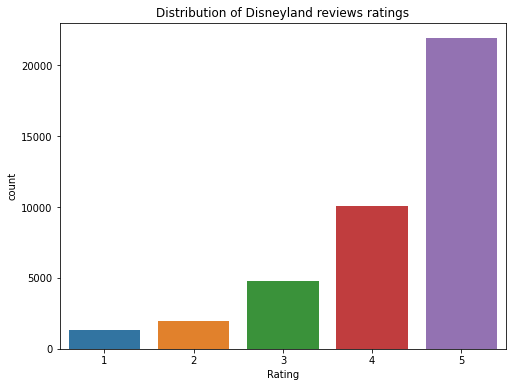

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Rating'])
plt.title('Distribution of Disneyland reviews ratings')
plt.show()

Reviews rated 5 had the highest bar while those rated 1 had the lowest bar.This means that most of Disneyland products satisfied its customers while  a few of them were dissapointd thus giving some of their products ratings of 1  and 2.

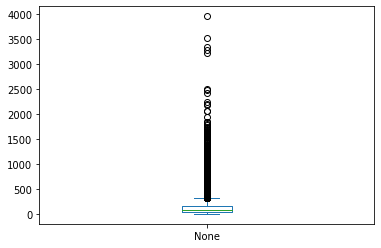

In [24]:
review_len = pd.Series(len(review.split()) for review in df['Review_Text'])
review_len.plot(kind='box')
plt.show('Distribution of outliers in the length of the texts')
plt.show()

count                                                  1338
unique                                                 1338
top       The main attractions were shut while we still ...
freq                                                      1
Name: Review_Text, dtype: object

Text(0.5, 0.98, 'Distribution of reviews rated 1')

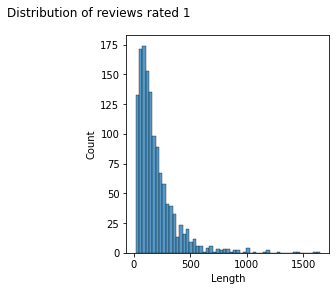

In [25]:
fig =  plt.figure(figsize=(8, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Review_Text.str.split().apply(len)
sns.histplot(df[df['Rating']==1]['Length'], ax=axes)
display(df.Review_Text[df['Rating']==1].describe())
plt.suptitle('Distribution of reviews rated 1')

count                                                  1929
unique                                                 1928
top       I love visiting here with my girlfriend but it...
freq                                                      2
Name: Review_Text, dtype: object

Text(0.5, 0.98, 'Distribution of reviews rated 2')

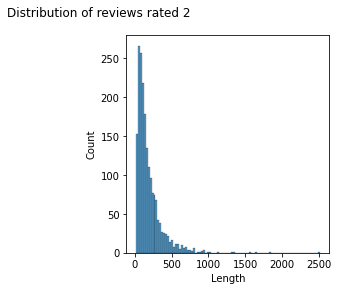

In [26]:
fig =  plt.figure(figsize=(8, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Review_Text.str.split().apply(len)
sns.histplot(df[df['Rating']==2]['Length'], ax=axes)
display(df.Review_Text[df['Rating']==2].describe())
plt.suptitle('Distribution of reviews rated 2')

count                                                  4782
unique                                                 4780
top       Having been to both, Hong Kong Disney land is ...
freq                                                      2
Name: Review_Text, dtype: object

Text(0.5, 0.98, 'Distribution of reviews rated 3')

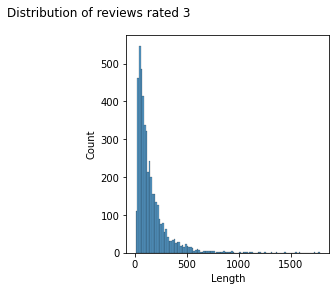

In [27]:
fig =  plt.figure(figsize=(8, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Review_Text.str.split().apply(len)
sns.histplot(df[df['Rating']==3]['Length'], ax=axes)
display(df.Review_Text[df['Rating']==3].describe())
plt.suptitle('Distribution of reviews rated 3')

count                                                 10086
unique                                                10079
top       Great for first timers, not so great for those...
freq                                                      2
Name: Review_Text, dtype: object

Text(0.5, 0.98, 'Distribution of reviews rated 4')

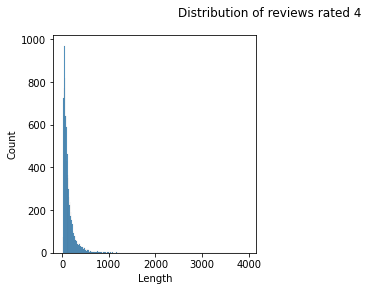

In [28]:
fig =  plt.figure(figsize=(8, 4))
axe = fig.add_subplot(121)
df['Length'] = df.Review_Text.str.split().apply(len)
sns.histplot(df[df['Rating']==4]['Length'], ax=axe)
display(df.Review_Text[df['Rating']==4].describe())
plt.suptitle('Distribution of reviews rated 4')

count                                                 21908
unique                                                21898
top       Like all the rides & show. Took photo with som...
freq                                                      2
Name: Review_Text, dtype: object

Text(0.5, 0.98, 'Distribution of reviews rated 5')

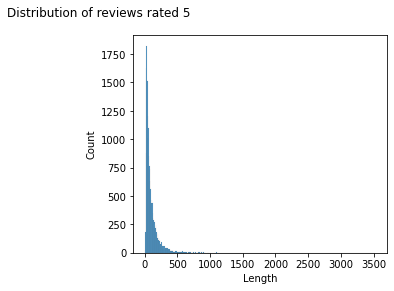

In [29]:
fig =  plt.figure(figsize=(10, 4))
axes = fig.add_subplot(122)
df['Length'] = df.Review_Text.str.split().apply(len)
sns.histplot(df[df['Rating']==5]['Length'], ax=axes)
display(df.Review_Text[df['Rating']==5].describe())
plt.suptitle('Distribution of reviews rated 5')

All ratings have distributions that are left skewed thus this can be corrected by normalizing them by using logarithmic notation.

A wordcloud is a visual representation of important and frequent words in the text. The bigger and frequent the word the more important it is.The following below are various wordclouds of reviews that were rated 1 to 5.

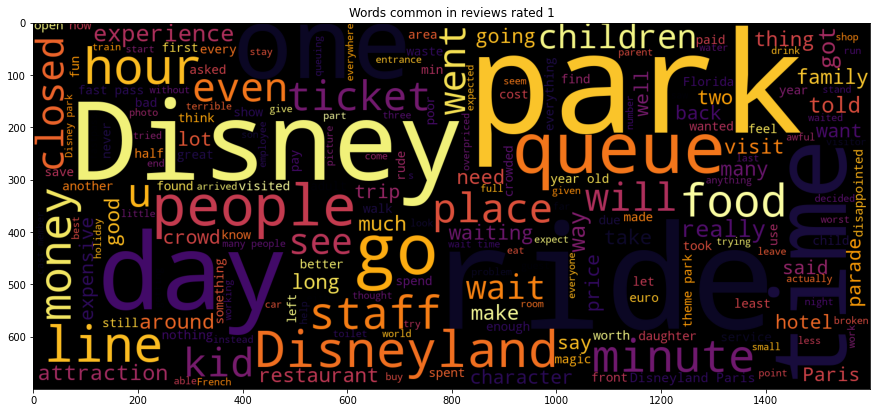

In [30]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 12))
wc = WordCloud(min_font_size=10, height=700, width=1600, background_color='black', colormap='inferno_r').generate(
    " ".join(df[df['Rating']==1].Review_Text)
)
plt.title('Words common in reviews rated 1')
plt.imshow(wc)

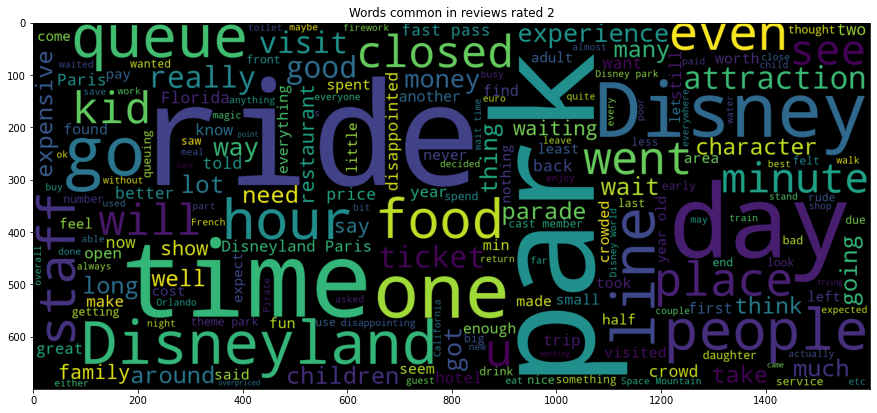

In [31]:
plt.figure(figsize=(15, 12))
wc = WordCloud(min_font_size=10, height=700, width=1600, background_color='black').generate(
    " ".join(df[df['Rating']==2].Review_Text)
)
plt.title('Words common in reviews rated 2')
plt.imshow(wc)

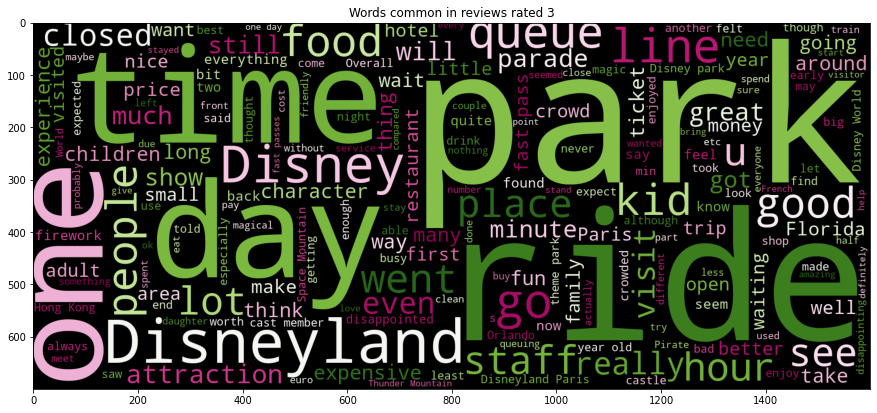

In [32]:
plt.figure(figsize=(15, 12))
wc = WordCloud(min_font_size=10, height=700, width=1600, background_color='black', colormap='PiYG').generate(
    " ".join(df[df['Rating']==3].Review_Text)
)
plt.title('Words common in reviews rated 3')
plt.imshow(wc)

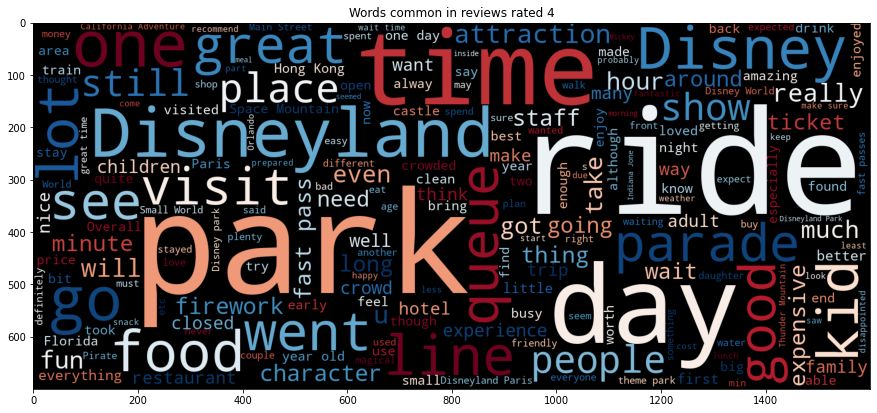

In [33]:
plt.figure(figsize=(15, 12))
wc = WordCloud(min_font_size=10, height=700, width=1600, background_color='black', colormap='RdBu_r').generate(
    " ".join(df[df['Rating']==4].Review_Text)
)
plt.title('Words common in reviews rated 4')
plt.imshow(wc)

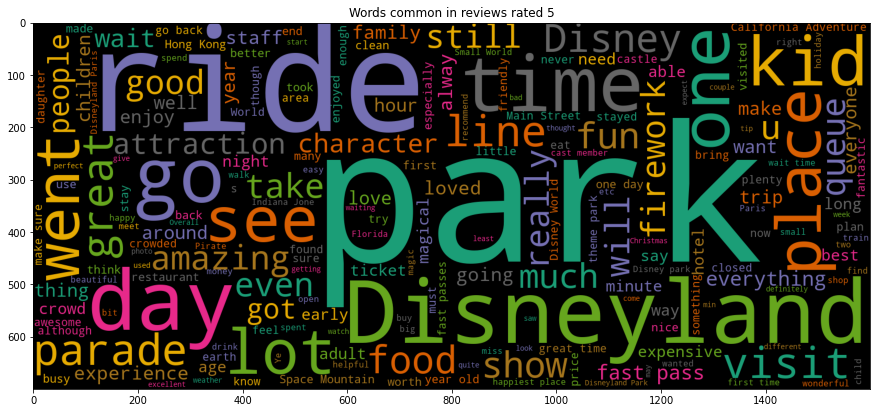

In [34]:
plt.figure(figsize=(15, 12))
wc = WordCloud(min_font_size=10, height=700, width=1600, background_color='black', colormap='Dark2').generate(
    " ".join(df[df['Rating']==5].Review_Text)
)
plt.title('Words common in reviews rated 5')
plt.imshow(wc)

In [35]:
# changing words in the text from proper case into lower case
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df.head()


,Review_Text,Rating,Length
0,if you've ever been to disneyland anywhere you...,4,59
1,its been a while since d last time we visit hk...,4,171
2,thanks god it wasn t too hot or too humid wh...,4,169
3,hk disneyland is a great compact park. unfortu...,4,91
4,"the location is not in the city, took around 1...",4,31


In [36]:
# removing html tags in the text
import re
df['Review_Text'] = df['Review_Text'].apply(lambda x :re.sub('http[s]?://\S+', ' ', x))

In [37]:
# removing punctuation marks from the text
df['Review_Text'] = df['Review_Text'].apply(lambda x : re.sub(r'[^a-z]+', ' ', x))

In [38]:
# a fuction of assigning reviews rated 3 to 5 be eaqual to 1 while the rest being assigned 0
def sentiment(review):
    if review >= 3:
        return 1
    else:
        return 0
df['sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review_Text,Rating,Length,sentiment
0,if you ve ever been to disneyland anywhere you...,4,59,1
1,its been a while since d last time we visit hk...,4,171,1
2,thanks god it wasn t too hot or too humid when...,4,169,1
3,hk disneyland is a great compact park unfortun...,4,91,1
4,the location is not in the city took around ho...,4,31,1


Ratings have been assigned values of 1 and 0 and mapped into a sentiment column.Rating and length columns are to be dropped since they are now inconsequential in our analysis.

In [39]:
# dropping ratings and length columns
df.drop(columns=['Rating', 'Length'], axis=1, inplace=True)


In [40]:
df.head()

,Review_Text,sentiment
0,if you ve ever been to disneyland anywhere you...,1
1,its been a while since d last time we visit hk...,1
2,thanks god it wasn t too hot or too humid when...,1
3,hk disneyland is a great compact park unfortun...,1
4,the location is not in the city took around ho...,1


In [41]:
#df['Review_Text'] = df['Review_Text'].apply(lambda x : " ".join(x.split()))

In [42]:

import nltk
from nltk.corpus import stopwords
def remove_stopwords(text):
    return [w for w in text.split() if w not in stopwords.words('english')]

In [43]:
#df['Review_Text'] = df['Review_Text'].apply(remove_stopwords)

In [44]:
from nltk.stem.porter import PorterStemmer
def stemming(text):
    ps = PorterStemmer()
    return[ps.stem(word) for word in text]


In [45]:
#df['Review_Text'] = df['Review_Text'].apply(stemming)

In [46]:
df.head()

,Review_Text,sentiment
0,if you ve ever been to disneyland anywhere you...,1
1,its been a while since d last time we visit hk...,1
2,thanks god it wasn t too hot or too humid when...,1
3,hk disneyland is a great compact park unfortun...,1
4,the location is not in the city took around ho...,1


In [47]:
# segmenting our dataset into x and y variables.
x = df['Review_Text']
y = df['sentiment']

NB: I tried using nlp packages of stopwords and PorterStemmer which are necessary to remove stopwords and modifying words into their basic forms but they failed to work on this dataset thus I chose to use stopwords from countvectorizer.

In [48]:
# countevectorizer is used to check how a certain word is frequent and mapping it into a vector.stopwords feature has been used to remove words 
# such as prepositions, auxilliary verbs etc.
#max_features denote the maximum variables to be assigned into the count vectorizer.

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english',max_features=10000)

In [49]:
# further splitting x and y variables into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# using count vectorizer to transform the data
x_train = count.fit_transform(x_train)
x_test = count.transform(x_test)

In [50]:
# modellling our data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
score = lr.score(x_test, y_test)
print(score)
pred = lr.predict(x_test)

0.9304532401048821


In [51]:
# a full report of performance of our model
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53       516
           1       0.97      0.95      0.96      7493

    accuracy                           0.93      8009
   macro avg       0.72      0.78      0.75      8009
weighted avg       0.94      0.93      0.93      8009

